# ABCD Method for estimating the Z-QCD correction factors.

In [1]:
import os
import sys
import matplotlib.pyplot as plt
print("Adding the following path to sys.path:", os.path.dirname(os.getcwd()))
sys.path.append(os.path.dirname(os.getcwd())) # Needed to load all the modules in the parent directory
from histogramHelpers import biner,ratioDataMinusBG
from AnalysisCommons.Run import INFO, WARNING, ERROR, DEBUG, Logger
Logger.LOGLEVEL = 3 # Set the log level

Adding the following path to sys.path: /Users/user/Documents/HEP/VBF-Analysis


## Test if EWjj model makes a difference in CRs

INFO: Using bin edges =  [   0.  250.  500.  750. 1000. 1250. 1500. 2000. 2500. 3000. 4000. 5000.]
INFO: Using bin edges =  [   0.  250.  500.  750. 1000. 1250. 1500. 2000. 2500. 3000. 4000. 5000.]
INFO: Using bin edges =  [   0.  250.  500.  750. 1000. 1250. 1500. 2000. 2500. 3000. 4000. 5000.]
INFO: Using bin edges =  [   0.  250.  500.  750. 1000. 1250. 1500. 2000. 2500. 3000. 4000. 5000.]
INFO: Using bin edges =  [   0.  250.  500.  750. 1000. 1250. 1500. 2000. 2500. 3000. 4000. 5000.]
INFO: Using bin edges =  [   0.  250.  500.  750. 1000. 1250. 1500. 2000. 2500. 3000. 4000. 5000.]


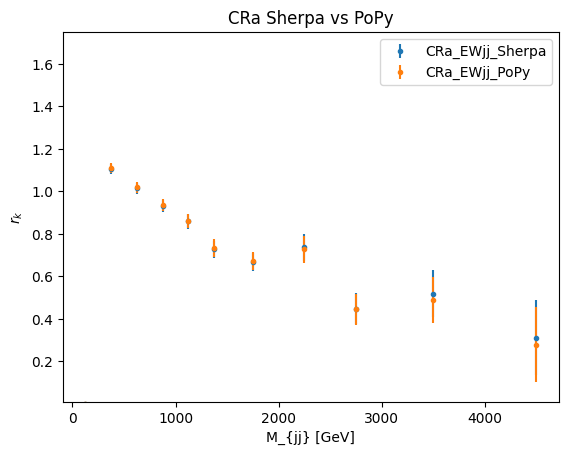

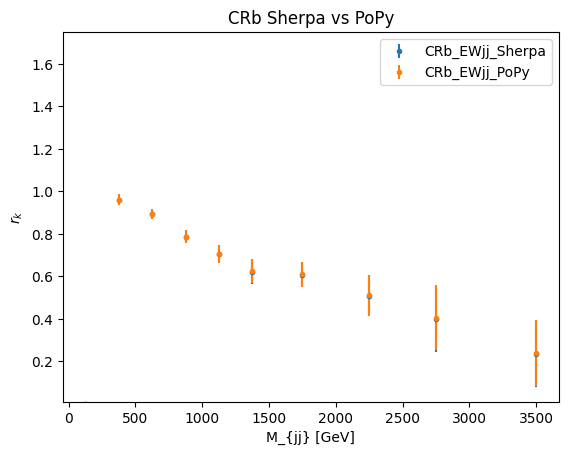

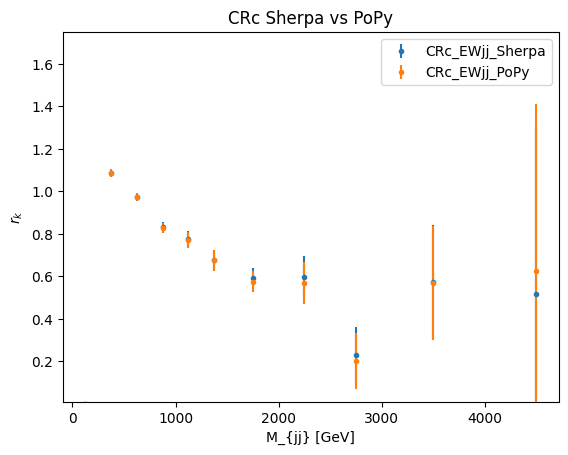

In [2]:
root_path = '/Users/user/Documents/HEP/VBF-Analysis/VBFAnalysisPlots/Zll/NewZpeak/'
path_CRa = root_path+"CRa"
path_CRb = root_path+"CRb"
path_CRc = root_path+"CRc"
signal = "Zll_Sherpa"

histo={
"mass_jj":[[1500,3000],[250,500,1000],250],
}

scaleFactors = {"Signal_Sherpa":1.0,"Signal_PoPy":1.0}

# Sherpa for EWjj
EWjjSample = "Signal_Sherpa"
bg_samples = [EWjjSample,"VV","VV_EWK","Wjets","ttbar","singletop"]
CRa_axis,CRa_y,CRa_error=ratioDataMinusBG(path_to_samples=path_CRa,signal_name=signal,data_name="Data",bg_names=bg_samples,histogram_info=histo,SFs=scaleFactors)
CRb_axis,CRb_y,CRb_error=ratioDataMinusBG(path_to_samples=path_CRb,signal_name=signal,data_name="Data",bg_names=bg_samples,histogram_info=histo,SFs=scaleFactors)
CRc_axis,CRc_y,CRc_error=ratioDataMinusBG(path_to_samples=path_CRc,signal_name=signal,data_name="Data",bg_names=bg_samples,histogram_info=histo,SFs=scaleFactors)

# Powheg+Pythia for EWjj + scaling
EWjjSample = "Signal_PoPy"
bg_samples = [EWjjSample,"VV","VV_EWK","Wjets","ttbar","singletop"]
CRa2_axis,CRa2_y,CRa2_error=ratioDataMinusBG(path_to_samples=path_CRa,signal_name=signal,data_name="Data",bg_names=bg_samples,histogram_info=histo,SFs=scaleFactors)
CRb2_axis,CRb2_y,CRb2_error=ratioDataMinusBG(path_to_samples=path_CRb,signal_name=signal,data_name="Data",bg_names=bg_samples,histogram_info=histo,SFs=scaleFactors)
CRc2_axis,CRc2_y,CRc2_error=ratioDataMinusBG(path_to_samples=path_CRc,signal_name=signal,data_name="Data",bg_names=bg_samples,histogram_info=histo,SFs=scaleFactors)


# Plot CRa
plt.errorbar(CRa_axis,CRa_y,yerr=CRa_error,fmt='.')
plt.errorbar(CRa2_axis,CRa2_y,yerr=CRa2_error,fmt='.')
plt.legend(['CRa_EWjj_Sherpa','CRa_EWjj_PoPy'])
plt.xlabel('M_{jj} [GeV]')
plt.ylabel(r"$r_k$")
plt.title('CRa Sherpa vs PoPy')
plt.ylim(0.01,1.75)
plt.show()
# Plot CRb
plt.errorbar(CRb_axis,CRb_y,yerr=CRb_error,fmt='.')
plt.errorbar(CRb2_axis,CRb2_y,yerr=CRb2_error,fmt='.')
plt.legend(['CRb_EWjj_Sherpa','CRb_EWjj_PoPy'])
plt.xlabel('M_{jj} [GeV]')
plt.ylabel(r"$r_k$")
plt.title('CRb Sherpa vs PoPy')
plt.ylim(0.01,1.75)
plt.show()
# Plot CRc
plt.errorbar(CRc_axis,CRc_y,yerr=CRc_error,fmt='.')
plt.errorbar(CRc2_axis,CRc2_y,yerr=CRc2_error,fmt='.')
plt.legend(['CRc_EWjj_Sherpa','CRc_EWjj_PoPy'])
plt.xlabel('M_{jj} [GeV]')
plt.ylabel(r"$r_k$")
plt.title('CRc Sherpa vs PoPy')
plt.ylim(0.01,1.75)
plt.show()

## Using mid point in the bins for the fit

In [3]:
print('X axis being used for CRa:', CRa_axis[1:], 'GeV')
print('X axis being used for CRb:', CRb_axis[1:], 'GeV')
print('X axis being used for CRc:', CRc_axis[1:], 'GeV')

X axis being used for CRa: [ 375.  625.  875. 1125. 1375. 1750. 2250. 2750. 3500. 4500.] GeV
X axis being used for CRb: [ 375.  625.  875. 1125. 1375. 1750. 2250. 2750. 3500.] GeV
X axis being used for CRc: [ 375.  625.  875. 1125. 1375. 1750. 2250. 2750. 3500. 4500.] GeV


## Fits in the CRs

In [4]:
from MjjFit import linear_model, parabolic_model, exponential_model, mjj_fit_experiment, FitExperimentContainer

experiments = FitExperimentContainer()

# EWjj Sherpa | QCDjj Sherpa - Linear and Parabolic fits
mjj_fit_experiment(linear_model, CRa_axis[1:], CRa_y[1:], CRa_error[1:], experiment_name="CRa_EWjjSherpa_QCDjjSherpa_linear", experiments_container=experiments)
mjj_fit_experiment(parabolic_model, CRa_axis[1:], CRa_y[1:], CRa_error[1:], experiment_name="CRa_EWjjSherpa_QCDjjSherpa_parabolic", experiments_container=experiments)
mjj_fit_experiment(exponential_model, CRa_axis[1:], CRa_y[1:], CRa_error[1:], experiment_name="CRa_EWjjSherpa_QCDjjSherpa_exponential", experiments_container=experiments)

mjj_fit_experiment(linear_model, CRb_axis[1:], CRb_y[1:], CRb_error[1:], experiment_name="CRb_EWjjSherpa_QCDjjSherpa_linear", experiments_container=experiments)
mjj_fit_experiment(parabolic_model, CRb_axis[1:], CRb_y[1:], CRb_error[1:], experiment_name="CRb_EWjjSherpa_QCDjjSherpa_parabolic", experiments_container=experiments)
mjj_fit_experiment(exponential_model, CRb_axis[1:], CRb_y[1:], CRb_error[1:], experiment_name="CRb_EWjjSherpa_QCDjjSherpa_exponential", experiments_container=experiments)

mjj_fit_experiment(linear_model, CRc_axis[1:], CRc_y[1:], CRc_error[1:], experiment_name="CRc_EWjjSherpa_QCDjjSherpa_linear", experiments_container=experiments)
mjj_fit_experiment(parabolic_model, CRc_axis[1:], CRc_y[1:], CRc_error[1:], experiment_name="CRc_EWjjSherpa_QCDjjSherpa_parabolic", experiments_container=experiments)
mjj_fit_experiment(exponential_model, CRc_axis[1:], CRc_y[1:], CRc_error[1:], experiment_name="CRc_EWjjSherpa_QCDjjSherpa_exponential", experiments_container=experiments)

# EWjj PoPy | QCDjj Sherpa - Linear and Parabolic fits
mjj_fit_experiment(parabolic_model, CRa2_axis[1:], CRa2_y[1:], CRa2_error[1:], experiment_name="CRa_EWjjPoPy_QCDjjSherpa_parabolic", experiments_container=experiments)
mjj_fit_experiment(parabolic_model, CRb2_axis[1:], CRb2_y[1:], CRb2_error[1:], experiment_name="CRb_EWjjPoPy_QCDjjSherpa_parabolic", experiments_container=experiments)
mjj_fit_experiment(parabolic_model, CRc2_axis[1:], CRc2_y[1:], CRc2_error[1:], experiment_name="CRc_EWjjPoPy_QCDjjSherpa_parabolic", experiments_container=experiments)

INFO: Adding new experiment CRa_EWjjSherpa_QCDjjSherpa_linear. 
INFO: Adding new experiment CRa_EWjjSherpa_QCDjjSherpa_parabolic. 
INFO: Adding new experiment CRa_EWjjSherpa_QCDjjSherpa_exponential. 
INFO: Adding new experiment CRb_EWjjSherpa_QCDjjSherpa_linear. 
INFO: Adding new experiment CRb_EWjjSherpa_QCDjjSherpa_parabolic. 
INFO: Adding new experiment CRb_EWjjSherpa_QCDjjSherpa_exponential. 
INFO: Adding new experiment CRc_EWjjSherpa_QCDjjSherpa_linear. 
INFO: Adding new experiment CRc_EWjjSherpa_QCDjjSherpa_parabolic. 
INFO: Adding new experiment CRc_EWjjSherpa_QCDjjSherpa_exponential. 
INFO: Adding new experiment CRa_EWjjPoPy_QCDjjSherpa_parabolic. 
INFO: Adding new experiment CRb_EWjjPoPy_QCDjjSherpa_parabolic. 
INFO: Adding new experiment CRc_EWjjPoPy_QCDjjSherpa_parabolic. 


(array([ 9.48249198e-08, -5.81846355e-04,  1.29116017e+00]),
 array([[ 5.95577893e-16, -1.44108186e-12,  6.36492024e-10],
        [-1.44108186e-12,  3.95790178e-09, -1.89908389e-06],
        [ 6.36492024e-10, -1.89908389e-06,  1.04551313e-03]]))

INFO: Displaying the figure without saving. 


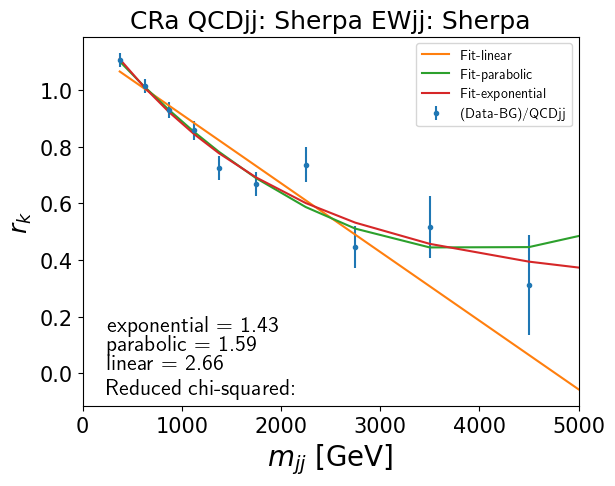

In [5]:
from MjjFit import display_fit_experiments
display_fit_experiments(experiments, "CRa", ["CRa_EWjjSherpa_QCDjjSherpa_linear", "CRa_EWjjSherpa_QCDjjSherpa_parabolic", "CRa_EWjjSherpa_QCDjjSherpa_exponential"])

INFO: Displaying the figure without saving. 


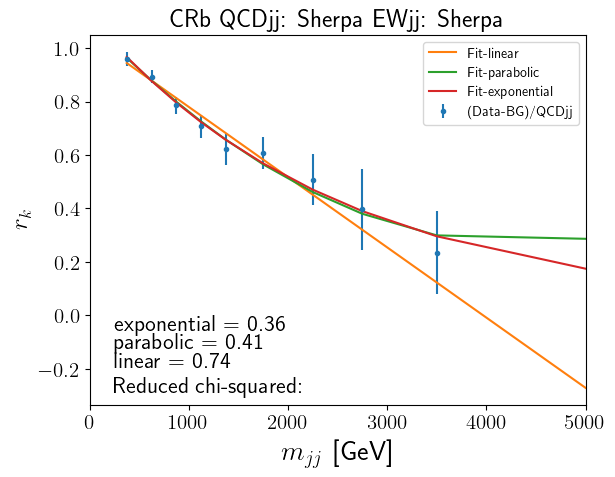

In [6]:
display_fit_experiments(experiments, "CRb", ["CRb_EWjjSherpa_QCDjjSherpa_linear","CRb_EWjjSherpa_QCDjjSherpa_parabolic", "CRb_EWjjSherpa_QCDjjSherpa_exponential"])

INFO: Displaying the figure without saving. 


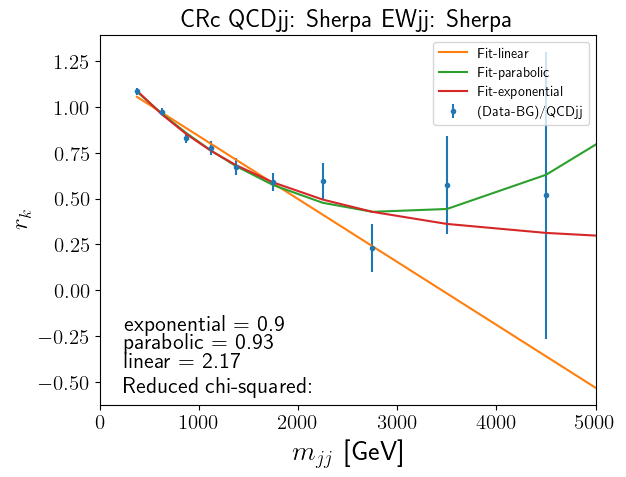

In [7]:
display_fit_experiments(experiments, "CRc", ["CRc_EWjjSherpa_QCDjjSherpa_linear","CRc_EWjjSherpa_QCDjjSherpa_parabolic", "CRc_EWjjSherpa_QCDjjSherpa_exponential"])

## Add the parabolic cutoff models for the CRs

In [8]:
from MjjFit import FitExperiment, parabolic_cutoff_model
import numpy as np

parabolic_experiment = experiments.get_experiment("CRa_EWjjSherpa_QCDjjSherpa_parabolic")
print(parabolic_experiment.make_single_prediction(2750))
experiment = FitExperiment(
    name = "CRa_EWjjSherpa_QCDjjSherpa_parabolic-cutoff",
    model = parabolic_cutoff_model,
    fit_parameters = parabolic_experiment.fit_parameters,
    fit_covariance = parabolic_experiment.fit_covariance,
    cutoff_value = 2750,
    x = parabolic_experiment.x,
    y = parabolic_experiment.y,
    y_uncer = parabolic_experiment.y_uncer,
)
experiments.add_experiment(experiment)

parabolic_experiment = experiments.get_experiment("CRb_EWjjSherpa_QCDjjSherpa_parabolic")
print(parabolic_experiment.make_single_prediction(3500))
experiment = FitExperiment(
    name = "CRb_EWjjSherpa_QCDjjSherpa_parabolic-cutoff",
    model = parabolic_cutoff_model,
    fit_parameters = parabolic_experiment.fit_parameters,
    fit_covariance = parabolic_experiment.fit_covariance,
    cutoff_value = 3500,
    x = parabolic_experiment.x,
    y = parabolic_experiment.y,
    y_uncer = parabolic_experiment.y_uncer,
)
experiments.add_experiment(experiment)

parabolic_experiment = experiments.get_experiment("CRc_EWjjSherpa_QCDjjSherpa_parabolic")
print(parabolic_experiment.make_single_prediction(2750))
experiment = FitExperiment(
    name = "CRc_EWjjSherpa_QCDjjSherpa_parabolic-cutoff",
    model = parabolic_cutoff_model,
    fit_parameters = parabolic_experiment.fit_parameters,
    fit_covariance = parabolic_experiment.fit_covariance,
    cutoff_value = 2750,
    x = parabolic_experiment.x,
    y = parabolic_experiment.y,
    y_uncer = parabolic_experiment.y_uncer,
)
experiments.add_experiment(experiment)

0.51+/-0.04
0.30+/-0.08
0.43+/-0.07


INFO: Displaying the figure without saving. 


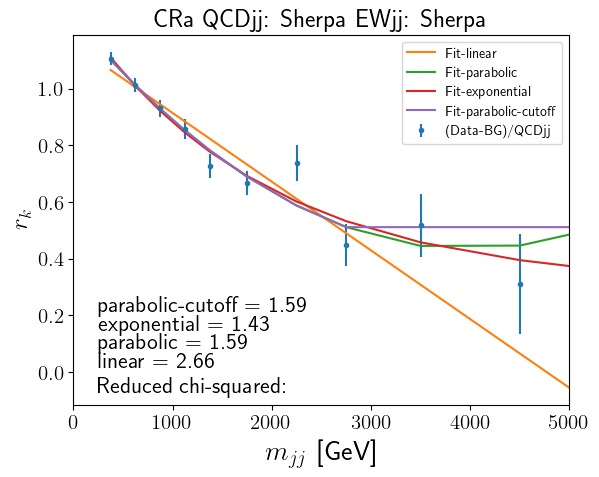

In [9]:
display_fit_experiments(experiments, "CRa", ["CRa_EWjjSherpa_QCDjjSherpa_linear",
                                             "CRa_EWjjSherpa_QCDjjSherpa_parabolic",
                                             "CRa_EWjjSherpa_QCDjjSherpa_exponential",
                                             "CRa_EWjjSherpa_QCDjjSherpa_parabolic-cutoff"])

INFO: Displaying the figure without saving. 


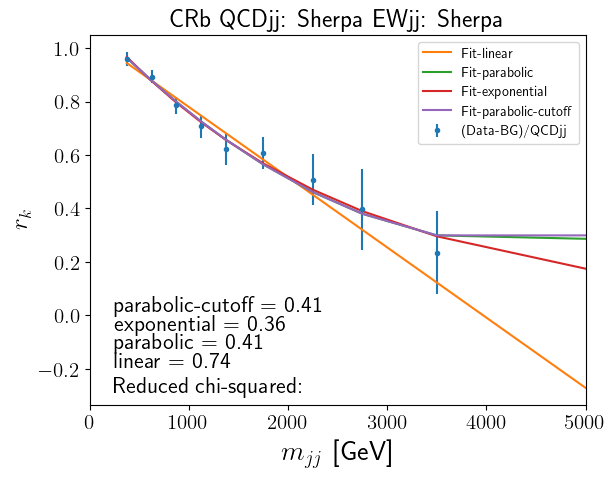

In [10]:
display_fit_experiments(experiments, "CRb", ["CRb_EWjjSherpa_QCDjjSherpa_linear",
                                             "CRb_EWjjSherpa_QCDjjSherpa_parabolic",
                                             "CRb_EWjjSherpa_QCDjjSherpa_exponential",
                                             "CRb_EWjjSherpa_QCDjjSherpa_parabolic-cutoff"])

INFO: Displaying the figure without saving. 


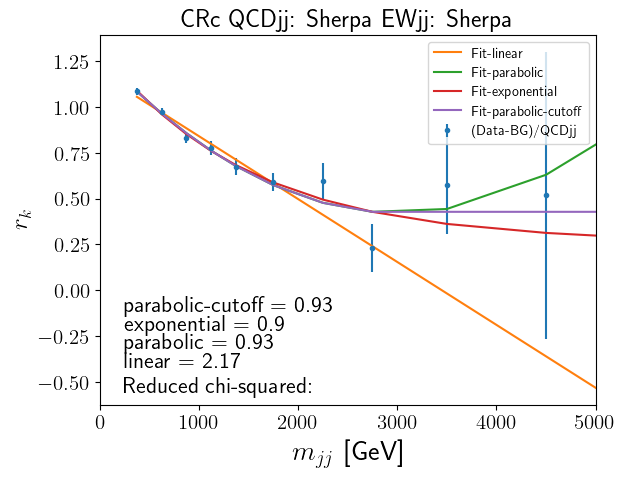

In [11]:
display_fit_experiments(experiments, "CRc", ["CRc_EWjjSherpa_QCDjjSherpa_linear",
                                             "CRc_EWjjSherpa_QCDjjSherpa_parabolic",
                                             "CRc_EWjjSherpa_QCDjjSherpa_exponential",
                                             "CRc_EWjjSherpa_QCDjjSherpa_parabolic-cutoff"])

In [12]:
from MjjFit import predict_SR_from_experiments
x = parabolic_experiment.x
x = np.append(250, x)
SR_y, SR_error = predict_SR_from_experiments(experiments, experiment_type = "EWjjSherpa_QCDjjSherpa_parabolic-cutoff", x_axis = x)
SR2_y, SR2_error = predict_SR_from_experiments(experiments, experiment_type = "EWjjSherpa_QCDjjSherpa_parabolic", x_axis = x)
SR3_y, SR3_error = predict_SR_from_experiments(experiments, experiment_type = "EWjjSherpa_QCDjjSherpa_exponential", x_axis = x)


In [13]:
print(x)

[ 250.  375.  625.  875. 1125. 1375. 1750. 2250. 2750. 3500. 4500.]


INFO: Using point-by-point prediction mode. These are the axis of the CRs:  
INFO: CRa: [ 375.  625.  875. 1125. 1375. 1750. 2250. 2750. 3500. 4500.] 
INFO: CRb: [ 375.  625.  875. 1125. 1375. 1750. 2250. 2750. 3500.] 
INFO: CRc: [ 375.  625.  875. 1125. 1375. 1750. 2250. 2750. 3500. 4500.] 
INFO: Found 9 valid elements in the CRs. Using them for the ABCD extrapolation 


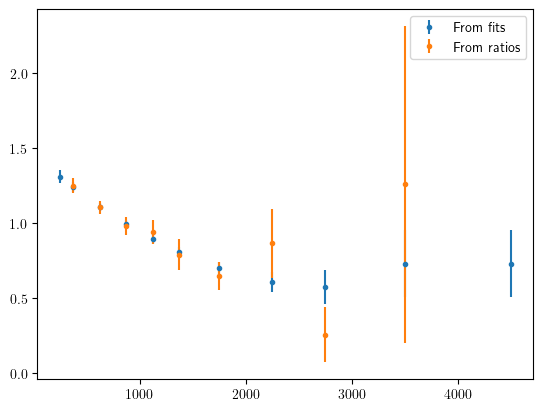

In [14]:
rk, rk_error = predict_SR_from_experiments(experiments, experiment_type = "EWjjSherpa_QCDjjSherpa_parabolic-cutoff", prediction_mode = 'point-by-point')
plt.errorbar(x,SR_y,yerr=SR_error,fmt='.', label='From fits')
plt.errorbar(x[1:len(rk)+1],rk,yerr=rk_error,fmt='.', label='From ratios')
plt.legend()

In [16]:

SR_fit, SR_cov = mjj_fit_experiment(parabolic_model, x, SR_y, SR_error, experiment_name="SRFromCutoffCRs_EWjjSherpa_QCDjjSherpa_parabolic", experiments_container=experiments)
SR2_fit, SR2_cov = mjj_fit_experiment(parabolic_model, x, SR2_y, SR2_error, experiment_name="SR2_EWjjSherpa_QCDjjSherpa_parabolic", experiments_container=experiments)
SR3_fit, SR3_cov = mjj_fit_experiment(exponential_model, x, SR3_y, SR3_error, experiment_name="SR3_EWjjSherpa_QCDjjSherpa_exponential", experiments_container=experiments)

parabolic_experiment = experiments.get_experiment("SRFromCutoffCRs_EWjjSherpa_QCDjjSherpa_parabolic")
print(parabolic_experiment.make_single_prediction(2750))
experiment = FitExperiment(
    name = "SR_EWjjSherpa_QCDjjSherpa_parabolic-cutoff",
    model = parabolic_cutoff_model,
    fit_parameters = parabolic_experiment.fit_parameters,
    fit_covariance = parabolic_experiment.fit_covariance,
    cutoff_value = 2750,
    x = parabolic_experiment.x,
    y = parabolic_experiment.y,
    y_uncer = parabolic_experiment.y_uncer,
)
experiments.add_experiment(experiment)

INFO: Do you want to overwrite it? (y/n) 
INFO: Overwriting experiment SRFromCutoffCRs_EWjjSherpa_QCDjjSherpa_parabolic. 
INFO: Experiment with name SRFromCutoffCRs_EWjjSherpa_QCDjjSherpa_parabolic removed. 
INFO: Do you want to overwrite it? (y/n) 
INFO: Overwriting experiment SR2_EWjjSherpa_QCDjjSherpa_parabolic. 
INFO: Experiment with name SR2_EWjjSherpa_QCDjjSherpa_parabolic removed. 
INFO: Do you want to overwrite it? (y/n) 
INFO: Overwriting experiment SR3_EWjjSherpa_QCDjjSherpa_exponential. 
INFO: Experiment with name SR3_EWjjSherpa_QCDjjSherpa_exponential removed. 
0.561+/-0.012


INFO: Displaying the figure without saving. 


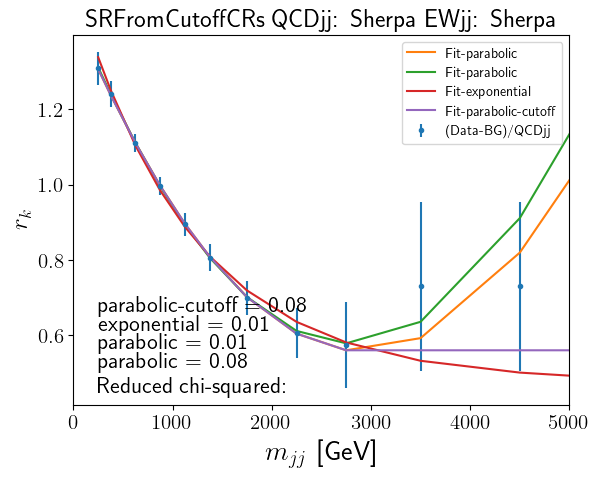

In [17]:
display_fit_experiments(experiments, "SR",
                        ["SRFromCutoffCRs_EWjjSherpa_QCDjjSherpa_parabolic",
                         "SR2_EWjjSherpa_QCDjjSherpa_parabolic",
                         "SR3_EWjjSherpa_QCDjjSherpa_exponential",
                         "SR_EWjjSherpa_QCDjjSherpa_parabolic-cutoff"])

In [19]:
experiment = experiments.get_experiment("SRFromCutoffCRs_EWjjSherpa_QCDjjSherpa_parabolic")
print(experiment.make_single_prediction(250))
experiment = experiments.get_experiment("SR2_EWjjSherpa_QCDjjSherpa_parabolic")
print(experiment.make_single_prediction(250))
experiment = experiments.get_experiment("SR3_EWjjSherpa_QCDjjSherpa_exponential")
print(experiment.make_single_prediction(250))

1.307+/-0.006
1.3112+/-0.0020
1.338+/-0.004


In [20]:
from MjjFit import convert_fit_result_to_dataframe

# Sherpa for EWjj
print("Sherpa for EWjj")
print("Parameters ",SR3_fit)
print("Covariance Matrix",SR3_cov)
print(convert_fit_result_to_dataframe(SR3_fit,SR3_cov,['a','b','c']))
print("\n")

convert_fit_result_to_dataframe(SR3_fit,SR3_cov,['a','b','c'])

Sherpa for EWjj
Parameters  [8.47307103e-04 1.06314779e+00 1.54110821e+00]
Covariance Matrix [[ 5.70295287e-10 -1.39309227e-07  1.55388883e-07]
 [-1.39309227e-07  9.14875204e-05 -8.28027500e-06]
 [ 1.55388883e-07 -8.28027500e-06  5.94002775e-05]]
          a   Sigma a         b   Sigma b         c   Sigma c
0  0.000847  0.000024  1.063148  0.009565  1.541108  0.007707




,a,Sigma a,b,Sigma b,c,Sigma c
0,0.000847,0.000024,1.063148,0.009565,1.541108,0.007707


# Write experiments to file

In [21]:
experiments.write_experiments_to_file('Fits_Zll_Sherpa.txt')

INFO: Experiments written to file results/Fits_Zll_Sherpa.txt. 
